In [1]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
data_dir=r"D:\D-downloads\Pneunomia chest xray\chest_xray\train"

In [3]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('D:/D-downloads/Pneunomia chest xray/chest_xray/train')

In [4]:
image_count1 = len(list(data_dir.glob('*/*.jpeg')))
print(image_count1)

5856


In [5]:
full_list=list(data_dir.glob('*/*.jpeg'))
full_list[3883]

WindowsPath('D:/D-downloads/Pneunomia chest xray/chest_xray/train/PNEUMONIA/person326_bacteria_1506.jpeg')

In [6]:
healthy=[]
pneu=[]
for paths in full_list:
    paths=str(paths)
    if "PNEUMONIA" in paths:
        pneu.append(pathlib.Path(paths))
    elif "NORMAL" in paths:
        healthy.append(pathlib.Path(paths))
len(healthy),len(pneu)

(1583, 4273)

In [7]:
healthy=np.array(healthy)
pneu=np.array(pneu)

In [8]:
pneu[:10]

array([WindowsPath('D:/D-downloads/Pneunomia chest xray/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg'),
       WindowsPath('D:/D-downloads/Pneunomia chest xray/chest_xray/train/PNEUMONIA/person1000_virus_1681.jpeg'),
       WindowsPath('D:/D-downloads/Pneunomia chest xray/chest_xray/train/PNEUMONIA/person1001_bacteria_2932.jpeg'),
       WindowsPath('D:/D-downloads/Pneunomia chest xray/chest_xray/train/PNEUMONIA/person1002_bacteria_2933.jpeg'),
       WindowsPath('D:/D-downloads/Pneunomia chest xray/chest_xray/train/PNEUMONIA/person1003_bacteria_2934.jpeg'),
       WindowsPath('D:/D-downloads/Pneunomia chest xray/chest_xray/train/PNEUMONIA/person1003_virus_1685.jpeg'),
       WindowsPath('D:/D-downloads/Pneunomia chest xray/chest_xray/train/PNEUMONIA/person1004_bacteria_2935.jpeg'),
       WindowsPath('D:/D-downloads/Pneunomia chest xray/chest_xray/train/PNEUMONIA/person1004_virus_1686.jpeg'),
       WindowsPath('D:/D-downloads/Pneunomia chest xray/chest_xray/train/PNEUMONI

In [9]:
np.random.shuffle(pneu)
pneu[:10]

array([WindowsPath('D:/D-downloads/Pneunomia chest xray/chest_xray/train/PNEUMONIA/person462_bacteria_1963.jpeg'),
       WindowsPath('D:/D-downloads/Pneunomia chest xray/chest_xray/train/PNEUMONIA/person175_bacteria_835.jpeg'),
       WindowsPath('D:/D-downloads/Pneunomia chest xray/chest_xray/train/PNEUMONIA/person150_bacteria_715.jpeg'),
       WindowsPath('D:/D-downloads/Pneunomia chest xray/chest_xray/train/PNEUMONIA/person1601_bacteria_4209.jpeg'),
       WindowsPath('D:/D-downloads/Pneunomia chest xray/chest_xray/train/PNEUMONIA/person531_bacteria_2240.jpeg'),
       WindowsPath('D:/D-downloads/Pneunomia chest xray/chest_xray/train/PNEUMONIA/person23_bacteria_101.jpeg'),
       WindowsPath('D:/D-downloads/Pneunomia chest xray/chest_xray/train/PNEUMONIA/person442_virus_898.jpeg'),
       WindowsPath('D:/D-downloads/Pneunomia chest xray/chest_xray/train/PNEUMONIA/person836_bacteria_2752.jpeg'),
       WindowsPath('D:/D-downloads/Pneunomia chest xray/chest_xray/train/PNEUMONIA/pers

In [10]:
pneu=pneu[:1583]
len(pneu),len(healthy)

(1583, 1583)

In [11]:
pneu_images_dict = {
    'pneu': pneu,
    'healthy': healthy,
}
pneu_labels_dict = {
    'pneu':0,
    'healthy':1,
}

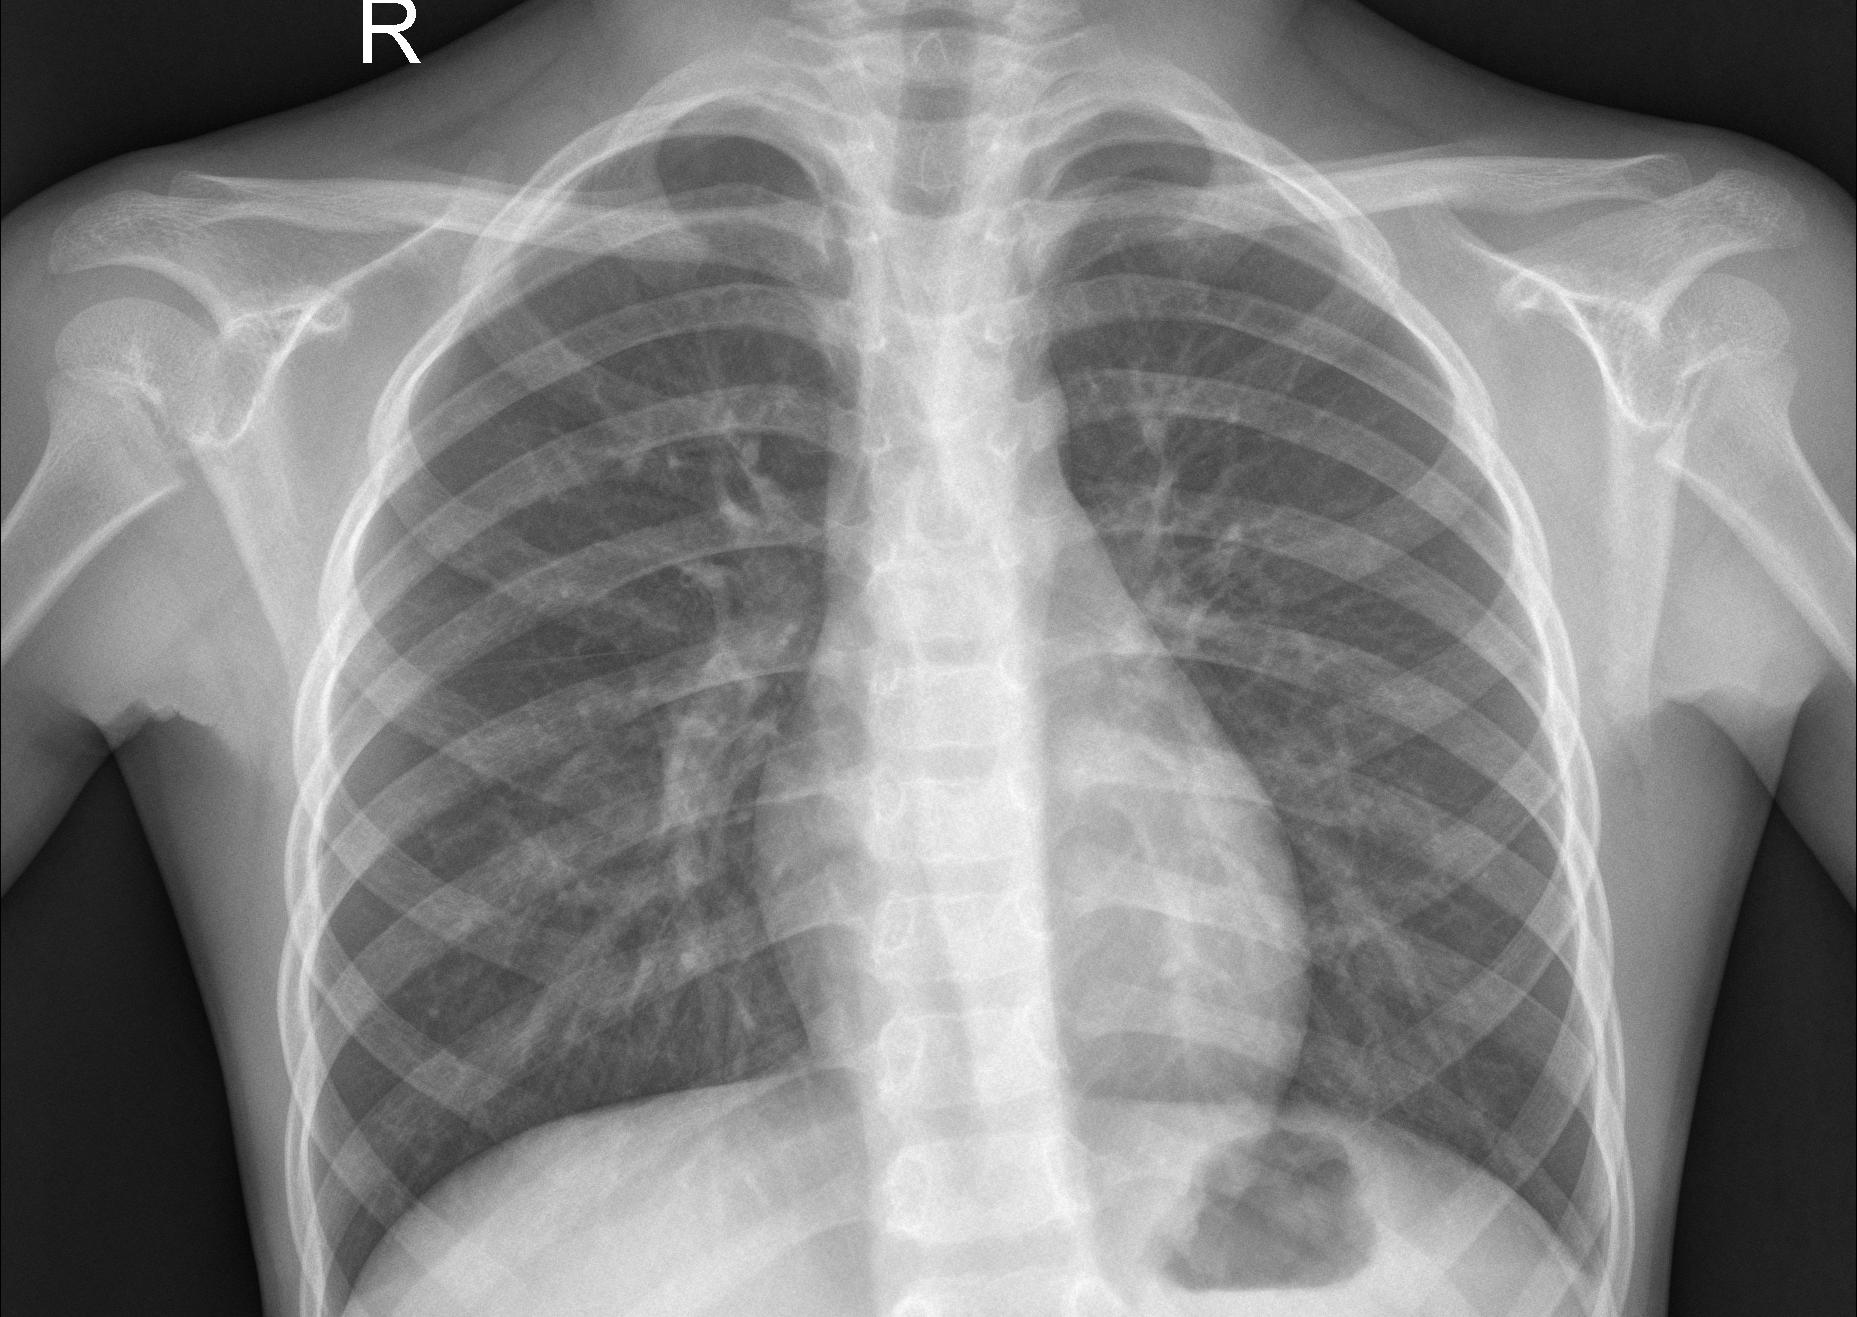

In [12]:
import PIL
PIL.Image.open(str(healthy[0]))

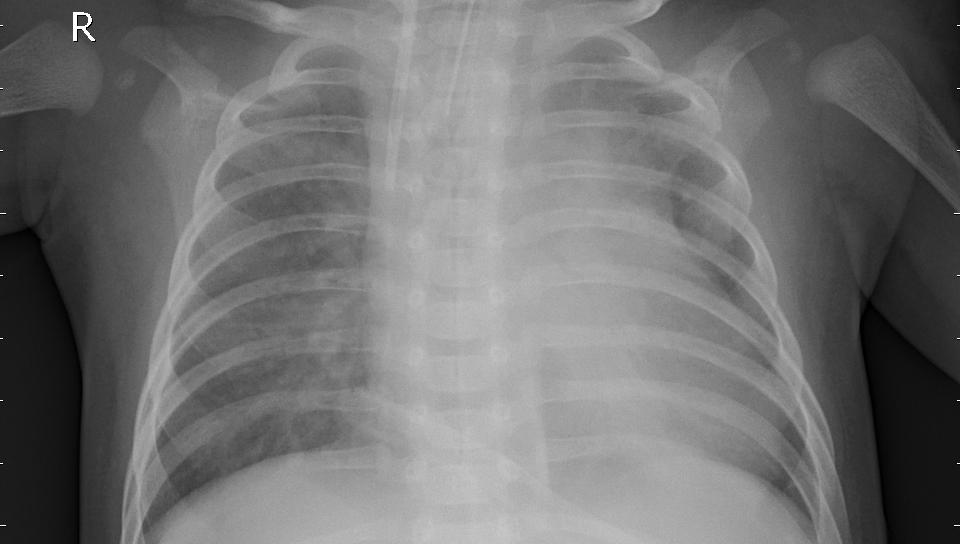

In [13]:
PIL.Image.open(str(pneu[0]))

In [14]:
np.shape(PIL.Image.open(str(pneu[76])))

(817, 1128)

In [15]:
X=[]
y=[]
# print("started")
# for if_pneu,images in pneu_train_images_dict.items():
#     i=0
#     for image in images:
#         print("Image number",i)
#         img = cv2.imread(str(image))
#         resized_img = cv2.resize(img,(1300,1300))
#         X_train.append(resized_img)
#         y_train.append(pneu_train_labels_dict[if_pneu])
#         i=i+1

In [16]:
for if_pneu,images in pneu_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(pneu_labels_dict[if_pneu])

In [17]:
len(X),len(y)

(3166, 3166)

In [18]:
X = np.array(X)
y = np.array(y)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,stratify=y)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2374, 224, 224, 3), (792, 224, 224, 3), (2374,), (792,))

In [21]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

### Artificial Neural Networks

In [52]:
ann = keras.Sequential([
        keras.layers.Flatten(input_shape=(224,224,3)),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(750, activation='relu'),
        keras.layers.Dense(500, activation='relu'),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(25, activation='relu'),
        keras.layers.Dense(10, activation='relu'),
        keras.layers.Dense(2, activation='softmax')    
    ])

ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
75/75 [==============================] - 185s 2s/step - loss: 136.9906 - accuracy: 0.4975
Epoch 2/5
75/75 [==============================] - 175s 2s/step - loss: 0.6932 - accuracy: 0.5000
Epoch 3/5
75/75 [==============================] - 174s 2s/step - loss: 0.6932 - accuracy: 0.5000
Epoch 4/5
75/75 [==============================] - 174s 2s/step - loss: 0.6932 - accuracy: 0.5000
Epoch 5/5
75/75 [==============================] - 174s 2s/step - loss: 0.6932 - accuracy: 0.4865


In [53]:
ann.evaluate(X_test_scaled, y_test)

25/25 [==============================] - 5s 156ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6931504607200623, 0.5]

### CNN (Without dropout and augmentation)

In [61]:
num_classes = 2

cnn1 = Sequential([
  layers.Conv2D(48, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes)
])

cnn1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
cnn1.fit(X_train_scaled, y_train, epochs=16)  

Epoch 1/16
75/75 [==============================] - 89s 1s/step - loss: 0.4616 - accuracy: 0.7852
Epoch 2/16
75/75 [==============================] - 85s 1s/step - loss: 0.2326 - accuracy: 0.9158
Epoch 3/16
75/75 [==============================] - 86s 1s/step - loss: 0.1777 - accuracy: 0.9364
Epoch 4/16
75/75 [==============================] - 86s 1s/step - loss: 0.1431 - accuracy: 0.9448
Epoch 5/16
75/75 [==============================] - 87s 1s/step - loss: 0.1341 - accuracy: 0.9503
Epoch 6/16
75/75 [==============================] - 90s 1s/step - loss: 0.1216 - accuracy: 0.9537
Epoch 7/16
75/75 [==============================] - 91s 1s/step - loss: 0.1162 - accuracy: 0.9579
Epoch 8/16
75/75 [==============================] - 90s 1s/step - loss: 0.0907 - accuracy: 0.9646
Epoch 9/16
75/75 [==============================] - 90s 1s/step - loss: 0.0862 - accuracy: 0.9693
Epoch 10/16
75/75 [==============================] - 90s 1s/step - loss: 0.0969 - accuracy: 0.9617
Epoch 11/16
75/75 [

In [62]:
cnn1.evaluate(X_test_scaled,y_test)

25/25 [==============================] - 7s 264ms/step - loss: 0.2226 - accuracy: 0.9268


[0.22263021767139435, 0.9267676472663879]

### CNN (With augmentation and regularisataion)

In [63]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(224, 
                                                              224,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [64]:
num_classes = 2

cnn2 = Sequential([
  data_augmentation,
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.15),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.05),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.15),
  layers.Dense(48, activation='relu'),
  layers.Dense(num_classes)
])

cnn2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
cnn2.fit(X_train_scaled, y_train, epochs=40) 

Epoch 1/40


75/75 [==============================] - 79s 985ms/step - loss: 0.6529 - accuracy: 0.6066
Epoch 2/40
75/75 [==============================] - 73s 972ms/step - loss: 0.4760 - accuracy: 0.7848
Epoch 3/40
75/75 [==============================] - 71s 952ms/step - loss: 0.3970 - accuracy: 0.8281
Epoch 4/40
75/75 [==============================] - 71s 948ms/step - loss: 0.3783 - accuracy: 0.8450
Epoch 5/40
75/75 [==============================] - 71s 951ms/step - loss: 0.3540 - accuracy: 0.8559
Epoch 6/40
75/75 [==============================] - 71s 943ms/step - loss: 0.3086 - accuracy: 0.8745
Epoch 7/40
75/75 [==============================] - 70s 928ms/step - loss: 0.2823 - accuracy: 0.8787
Epoch 8/40
75/75 [==============================] - 70s 938ms/step - loss: 0.2633 - accuracy: 0.8901
Epoch 9/40
75/75 [==============================] - 71s 946ms/step - loss: 0.2642 - accuracy: 0.8939
Epoch 10/40
75/75 [==============================] - 72s 954ms/step - loss: 0.2445 - accuracy: 0.9002


In [65]:
cnn2.evaluate(X_test_scaled,y_test)

25/25 [==============================] - 10s 322ms/step - loss: 0.1812 - accuracy: 0.9242


[0.18118074536323547, 0.9242424368858337]

### CNN with only regularisation

In [22]:
num_classes = 2

cnn3 = Sequential([
  layers.Conv2D(48, 3, padding='same', activation='relu'),
  layers.Dropout(0.05),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.05),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.Dropout(0.15),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.1),
  layers.Dense(64, activation='relu'),
  layers.Dropout(0.15),
  layers.Dense(num_classes)
])

cnn3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
cnn3.fit(X_train_scaled, y_train, epochs=20)  

Epoch 1/20
75/75 [==============================] - 160s 2s/step - loss: 0.4595 - accuracy: 0.7767
Epoch 2/20
75/75 [==============================] - 126s 2s/step - loss: 0.2294 - accuracy: 0.9136
Epoch 3/20
75/75 [==============================] - 122s 2s/step - loss: 0.1857 - accuracy: 0.9305
Epoch 4/20
75/75 [==============================] - 125s 2s/step - loss: 0.1530 - accuracy: 0.9452
Epoch 5/20
75/75 [==============================] - 126s 2s/step - loss: 0.1409 - accuracy: 0.9461
Epoch 6/20
75/75 [==============================] - 129s 2s/step - loss: 0.1467 - accuracy: 0.9436
Epoch 7/20
75/75 [==============================] - 125s 2s/step - loss: 0.1282 - accuracy: 0.9495
Epoch 8/20
75/75 [==============================] - 125s 2s/step - loss: 0.1318 - accuracy: 0.9528
Epoch 9/20
75/75 [==============================] - 128s 2s/step - loss: 0.1167 - accuracy: 0.9566
Epoch 10/20
75/75 [==============================] - 125s 2s/step - loss: 0.1008 - accuracy: 0.9617
Epoch 11/

In [23]:
cnn3.evaluate(X_test_scaled,y_test)

25/25 [==============================] - 9s 246ms/step - loss: 0.1320 - accuracy: 0.9482


[0.1319836527109146, 0.9482323527336121]

### Mobile net v2 model

In [24]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [25]:
num_of_classes = 2

mobilenet_v2_model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_classes)
])

mobilenet_v2_model.summary()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense_3 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [26]:
mobilenet_v2_model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

mobilenet_v2_model.fit(X_train_scaled, y_train, epochs=32)

Epoch 1/32
75/75 [==============================] - 45s 494ms/step - loss: 0.2915 - acc: 0.8778
Epoch 2/32
75/75 [==============================] - 37s 489ms/step - loss: 0.1682 - acc: 0.9351
Epoch 3/32
75/75 [==============================] - 37s 493ms/step - loss: 0.1517 - acc: 0.9377
Epoch 4/32
75/75 [==============================] - 37s 496ms/step - loss: 0.1324 - acc: 0.9520
Epoch 5/32
75/75 [==============================] - 37s 497ms/step - loss: 0.1213 - acc: 0.9587
Epoch 6/32
75/75 [==============================] - 38s 500ms/step - loss: 0.1183 - acc: 0.9591
Epoch 7/32
75/75 [==============================] - 1612s 22s/step - loss: 0.1108 - acc: 0.9612
Epoch 8/32
75/75 [==============================] - 40s 533ms/step - loss: 0.1021 - acc: 0.9671
Epoch 9/32
75/75 [==============================] - 55s 733ms/step - loss: 0.0971 - acc: 0.9680
Epoch 10/32
75/75 [==============================] - 70s 934ms/step - loss: 0.0977 - acc: 0.9684
Epoch 11/32
75/75 [====================

In [27]:
mobilenet_v2_model.evaluate(X_test_scaled,y_test)

25/25 [==============================] - 50s 1s/step - loss: 0.1137 - acc: 0.9545


[0.1137315183877945, 0.9545454382896423]

In [28]:
Y_pred = mobilenet_v2_model.predict(X_test_scaled)

25/25 [==============================] - 34s 980ms/step


In [29]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]

In [30]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,Y_pred_labels))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       396
           1       0.95      0.96      0.95       396

    accuracy                           0.95       792
   macro avg       0.95      0.95      0.95       792
weighted avg       0.95      0.95      0.95       792



Text(69.0, 0.5, 'Truth')

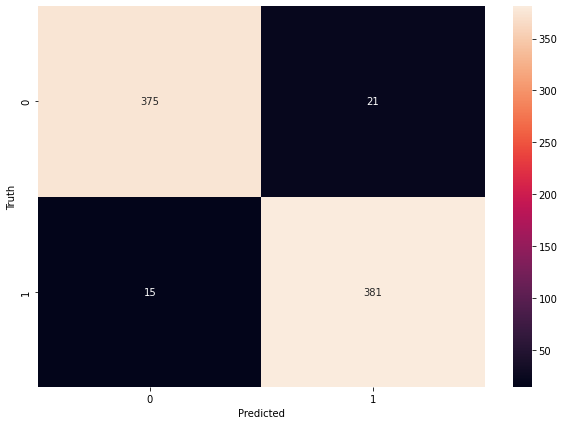

In [31]:
import seaborn as sns
cm=confusion_matrix(y_test,Y_pred_labels)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')